### Business problem

Business problem atau masalah bisnisnya mungkin terkait dengan efisiensi dan manajemen sumber daya terkait lintasan sepeda. Misalnya, jika terdapat fluktuasi jumlah lintasan sepeda yang berkaitan dengan perubahan cuaca, pengelola lintasan sepeda dapat menggunakan model ini untuk membuat perkiraan dan mengoptimalkan pelayanan mereka sesuai dengan kondisi cuaca yang diantisipasi.

### Business goal
Business goal atau tujuan bisnisnya mungkin adalah untuk memahami bagaimana faktor cuaca seperti suhu dan curah hujan mempengaruhi jumlah lintasan sepeda di berbagai jembatan di New York City. Dengan pemahaman ini, bisnis dapat mengambil keputusan yang lebih baik terkait manajemen lintasan sepeda, termasuk penjadwalan dan pengelolaan fasilitas sepeda, berdasarkan prakiraan cuaca.

### Contoh
Sebagai contoh, jika model menunjukkan bahwa pada hari-hari dengan suhu tinggi, lebih banyak orang cenderung menggunakan sepeda, pengelola lintasan sepeda dapat menyesuaikan kapasitas dan pelayanan mereka untuk mengatasi peningkatan permintaan. Demikian juga, mereka dapat merencanakan strategi khusus saat ada prediksi curah hujan tinggi yang dapat mempengaruhi minat orang untuk menggunakan sepeda.

### Importing Relevant Libraries

In [3]:
# %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from pandas import set_option
plt.rcParams['figure.figsize'] = (25,18)

### Reading Data

The data has repeated values. Hence, I will be taking the first 10 days of data.

In [4]:
nyc_data = pd.read_csv('../dataset/nyc-east-river-bicycle-counts.csv', index_col='Date', parse_dates = True)

In [5]:
nyc_data.head()

,Unnamed: 0,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
Date,,,,,,,,,,
2016-04-01,0,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
2016-04-02,1,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2016-04-03,2,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
2016-04-04,3,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
2016-04-05,4,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


The head and tail commands show that the data is available for the month of April, i.e. starting from 1st April, 2016. to 30th April, 2016. As seen, we have the High/Low and Precipitation temperatures for all these days and the number of bikes crossing the 4 bridges. 

### Data Cleanup 

Dropping column 'Day' as 'Date' covers the same data. Also, cleaning up column names.

In [6]:
nyc_data =  nyc_data.drop('Day', axis = 1)
nyc_data =  nyc_data.drop('Unnamed: 0', axis = 1)
nyc_data = nyc_data.rename(columns={"High Temp (°F)": "HighTemp", "Low Temp (°F)": "LowTemp", "Precipitation	":"Precipitation"})
nyc_data.head()

,HighTemp,LowTemp,Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
Date,,,,,,,,
2016-04-01,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
2016-04-02,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2016-04-03,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
2016-04-04,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
2016-04-05,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


Looking at the types of columns, we see Precipitation as an object. To use it in our analysis, we need to clean it up

In [7]:
nyc_data.dtypes

HighTemp               float64
LowTemp                float64
Precipitation           object
Brooklyn Bridge        float64
Manhattan Bridge         int64
Williamsburg Bridge    float64
Queensboro Bridge      float64
Total                    int64
dtype: object

In [8]:
prep = nyc_data['Precipitation'].replace(['0.47 (S)'], '0.47')
prep = prep.replace(['T'], '0')
prep = prep.astype(float)
nyc_data['Precipitation'] = prep
nyc_data.head(4)

,HighTemp,LowTemp,Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
Date,,,,,,,,
2016-04-01,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
2016-04-02,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2016-04-03,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
2016-04-04,44.1,33.1,0.47,521.0,1067,1440.0,1307.0,4335


In [9]:
nyc_data.dtypes

HighTemp               float64
LowTemp                float64
Precipitation          float64
Brooklyn Bridge        float64
Manhattan Bridge         int64
Williamsburg Bridge    float64
Queensboro Bridge      float64
Total                    int64
dtype: object

In [10]:
nyc_data.describe()

,HighTemp,LowTemp,Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,60.580000,46.413333,0.052333,2269.633333,4049.533333,4862.466667,3352.866667,14534.500000
std,11.183223,9.522796,0.102148,981.237786,1704.731356,1814.039499,1099.254419,5569.173496
min,39.900000,26.100000,0.000000,504.000000,997.000000,1440.000000,1306.000000,4335.000000
25%,55.000000,44.100000,0.000000,1447.000000,2617.000000,3282.000000,2457.000000,9596.000000
50%,62.100000,46.900000,0.000000,2379.500000,4165.000000,5194.000000,3477.000000,15292.500000
75%,68.000000,50.000000,0.090000,3147.000000,5309.000000,6030.000000,4192.000000,18315.000000
max,81.000000,66.000000,0.470000,3871.000000,6951.000000,7834.000000,5032.000000,23318.000000


In [11]:
nyc_data.corr()

,HighTemp,LowTemp,Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
HighTemp,1.000000,0.823853,-0.345898,0.739377,0.720175,0.764336,0.727825,0.743344
LowTemp,0.823853,1.000000,-0.165441,0.464550,0.465097,0.534212,0.475725,0.492124
Precipitation,-0.345898,-0.165441,1.000000,-0.599514,-0.588419,-0.576076,-0.596254,-0.591079
Brooklyn Bridge,0.739377,0.464550,-0.599514,1.000000,0.983148,0.980463,0.976991,0.989339
Manhattan Bridge,0.720175,0.465097,-0.588419,0.983148,1.000000,0.989805,0.985867,0.996323
Williamsburg Bridge,0.764336,0.534212,-0.576076,0.980463,0.989805,1.000000,0.988852,0.996639
Queensboro Bridge,0.727825,0.475725,-0.596254,0.976991,0.985867,0.988852,1.000000,0.993391
Total,0.743344,0.492124,-0.591079,0.989339,0.996323,0.996639,0.993391,1.000000


### Data Visualization

Visualizing the correlations:

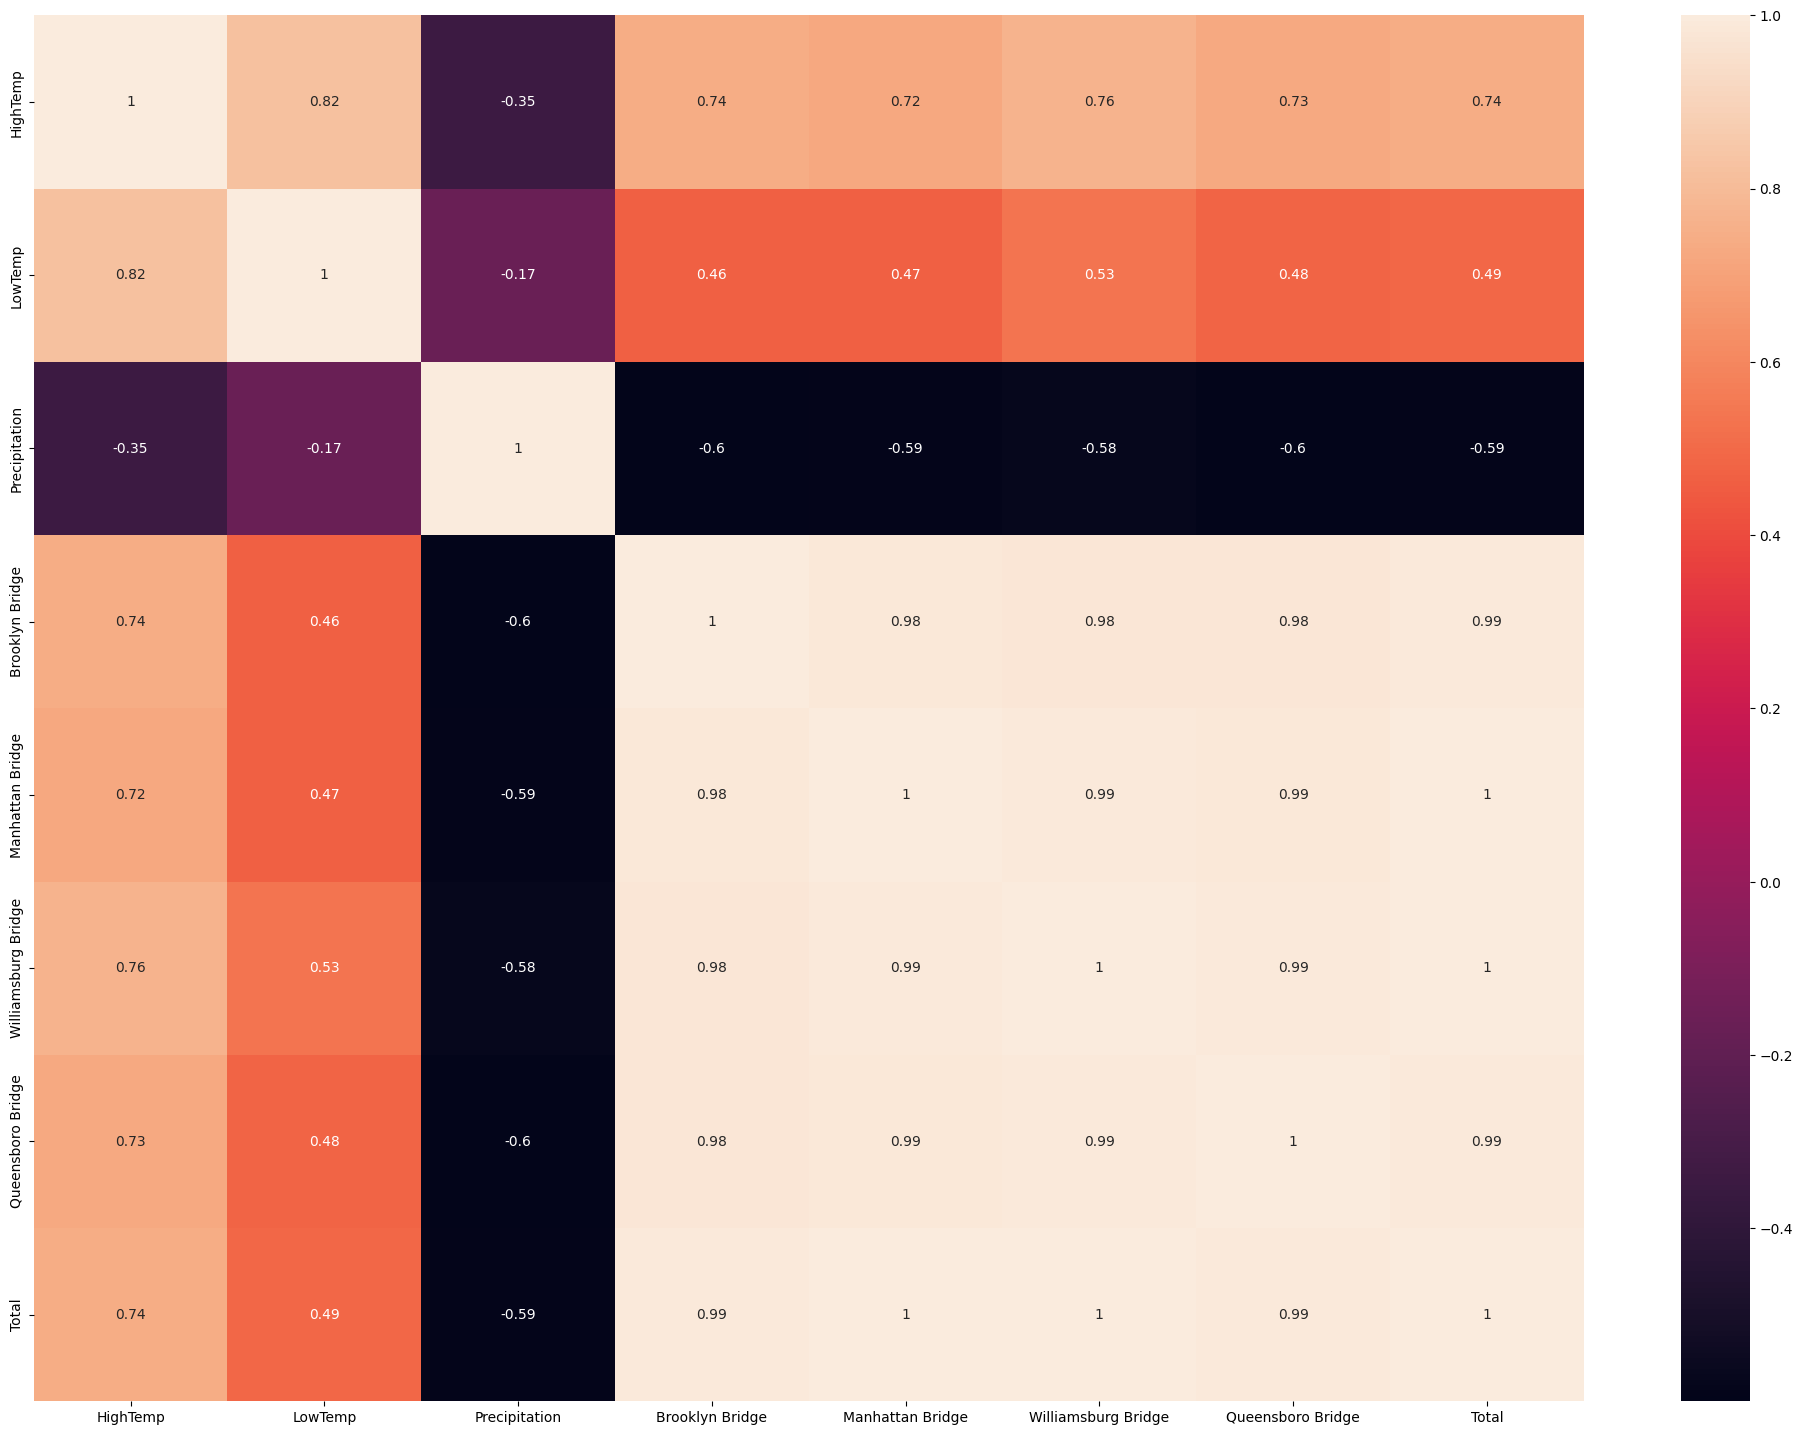

In [12]:
sns.heatmap(nyc_data.corr(),annot = True)
plt.show()

The heatmap shows that the number of rides clearly shows a negative correlation with precipitation. We also see a high positive correlation with HighTemp and rides, indicating a correlation.
To validate this, lets plot Total Rides with Precipitation. As seen, the number of rides is the more on days when precipitation is 0. 

c:\Users\agusa\anaconda3\envs\tf\Lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


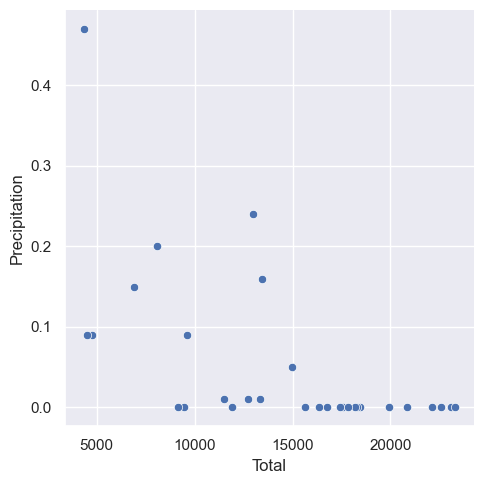

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="darkgrid")
sns.relplot( x="Total", y="Precipitation", data=nyc_data);

c:\Users\agusa\anaconda3\envs\tf\Lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\agusa\anaconda3\envs\tf\Lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


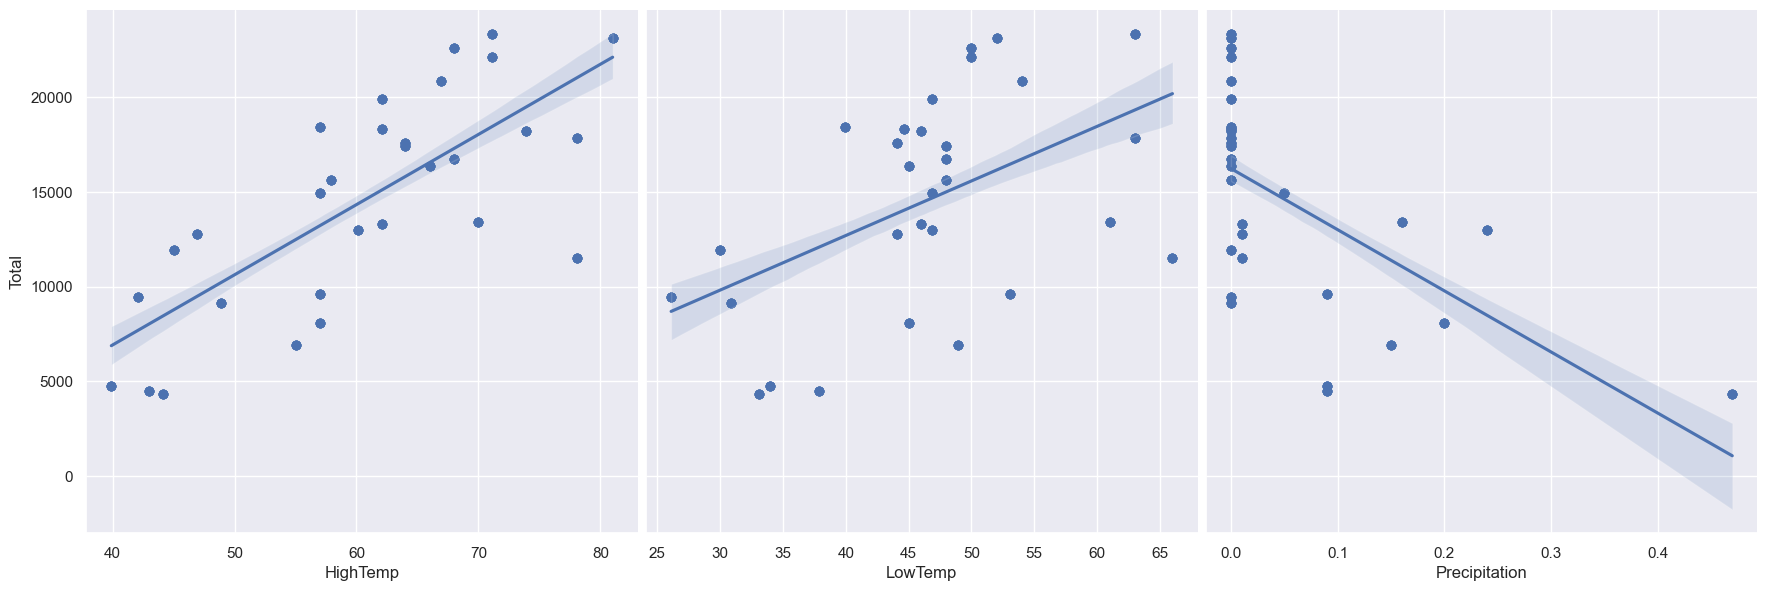

In [14]:
sns.pairplot(nyc_data,x_vars=['HighTemp', 'LowTemp','Precipitation'],y_vars='Total',kind='reg',size=6)
plt.show()

Lets see the rides across the bridges spread for the month. 

<Axes: xlabel='Date'>

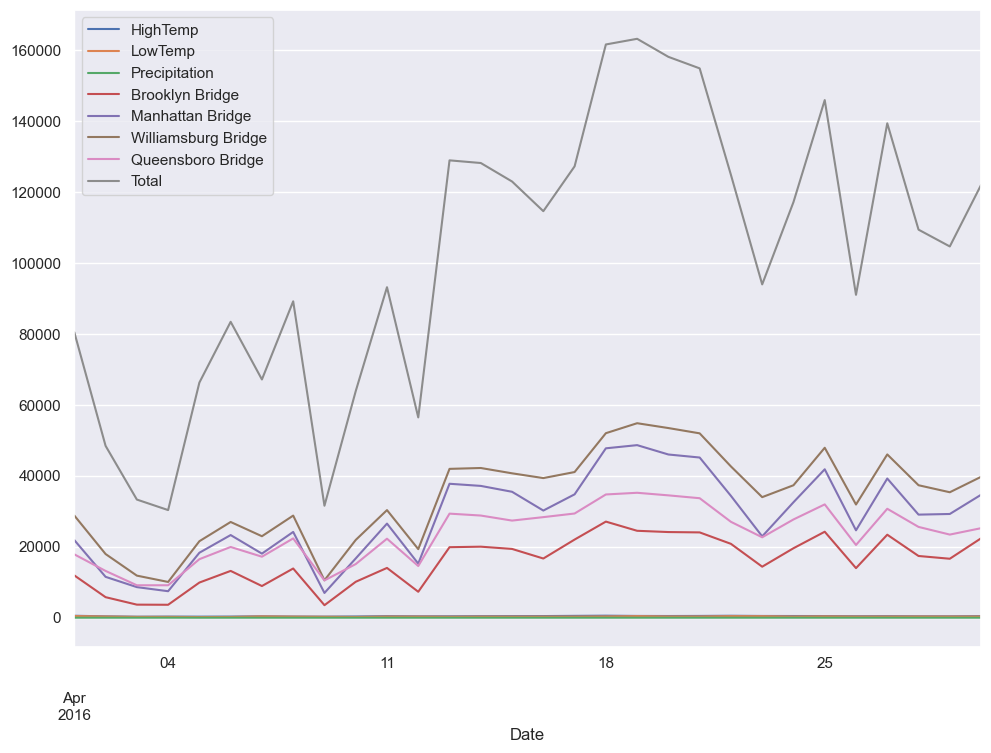

In [15]:
nyc_data.resample('D').sum().plot()

As seen from the chart, the highest number of rides ever recorded in a day is around 22-23k, and the lowest reaching just below 5k rides. 

### Regression

Lets go ahead and fit a linear model on the data. Before we do that, let us create data for train and test

In [16]:
x =nyc_data.drop(['Total','Brooklyn Bridge','Manhattan Bridge','Williamsburg Bridge','Queensboro Bridge'],axis=1)
y = nyc_data['Total']

In [ ]:
xtrain.info()

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=1)

In [18]:
linear_model = LinearRegression()
lr = linear_model.fit(xtrain,ytrain)
print(lr.intercept_)
lr.coef_

-1968.3339234671275


array([   412.26754442,   -161.36259509, -20099.44431379])

In [ ]:
# lr.score(xtrain,ytest)

In [19]:
y_pred = linear_model.predict(xtest)
np.sqrt(metrics.mean_squared_error(ytest,y_pred))

2819.7450681452506

In [20]:
df = pd.DataFrame({})
df = pd.concat([xtest,ytest],axis=1)
df['Predicted Total'] = np.round(y_pred,2)
df['Error'] = df['Total'] - df['Predicted Total']
df

,HighTemp,LowTemp,Precipitation,Total,Predicted Total,Error
Date,,,,,,
2016-04-15,64.0,44.1,0.00,17570,17300.70,269.30
2016-04-09,43.0,37.9,0.09,4510,7834.58,-3324.58
2016-04-22,78.1,63.0,0.00,17837,20063.92,-2226.92
2016-04-25,66.9,54.0,0.00,20850,16898.78,3951.22
2016-04-06,45.0,30.0,0.00,11919,11742.83,176.17
2016-04-30,64.0,48.0,0.00,17432,16671.38,760.62
2016-04-04,44.1,33.1,0.47,4335,1424.82,2910.18
2016-04-18,81.0,52.0,0.00,23090,23034.48,55.52
2016-04-26,60.1,46.9,0.24,13005,10417.17,2587.83


This completes this notebook for linear regression

In [21]:
import joblib

In [22]:
joblib.dump(lr, 'linear_regresion_model.pkl')

['linear_regresion_model.pkl']